In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sys
sys.path.append("../scripts")
# from data_cleaner import Data_cleaner
from util import Util
from data_cleaner import DataCleaner
from plotter import Plotter

In [162]:
warnings.filterwarnings("ignore")
util = Util()
cleaner= DataCleaner()
plotter = Plotter()

### Our DVC tags are
- 'sample-v0' - the original sample_submission dataset
- 'store-v0' - the original store dataset
- 'store-v1' - the cleaned store dataset
- 'test-v0' - the original test dataset
- 'test-v1' - the cleaned test dataset
- 'test-v2' - the cleaned test dataset (better way)
- 'train-v0' - the original train dataset
- 'train-v1' - the cleaned train dataset
- 'train-v1' - the cleaned train dataset (better way)

In [7]:
# read our merged train and test dataset

# repo="https://github.com/Nathnael12/pharmaceutical-sales-pridiction.git"
repo="../"

store=util.read_from_dvc("data/store.csv",repo,"store-v1",low_memory=False)
complete_test=util.read_from_dvc("data/test.csv",repo,"test-v2",low_memory=False)
complete_train=util.read_from_dvc("data/train.csv",repo,"train-v2",low_memory=False)

In [8]:
complete_test=cleaner.convert_to_string(complete_test,"PromoInterval")
complete_train=cleaner.convert_to_string(complete_train,"PromoInterval")

In [9]:
complete_test.isnull().sum()

Store                         0
StoreType                     0
Assortment                    0
CompetitionDistance           0
CompetitionOpenSinceMonth     0
CompetitionOpenSinceYear      0
Promo2                        0
Promo2SinceWeek               0
Promo2SinceYear               0
PromoInterval                 0
Id                            0
DayOfWeek                     0
Date                          0
Open                         11
Promo                         0
StateHoliday                  0
SchoolHoliday                 0
dtype: int64

In [10]:
complete_train.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64

The only left column is 'Open' we can fill that with 0 and assume the store is not open on that specific date

In [11]:
complete_test[complete_test["Open"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
22992,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,nan,480,4,2015-09-17,NaN,1,0,0
22993,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,nan,1336,3,2015-09-16,NaN,1,0,0
22994,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,nan,2192,2,2015-09-15,NaN,1,0,0
22995,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,nan,3048,1,2015-09-14,NaN,1,0,0
22997,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,nan,4760,6,2015-09-12,NaN,0,0,0
22998,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,nan,5616,5,2015-09-11,NaN,0,0,0
22999,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,nan,6472,4,2015-09-10,NaN,0,0,0
23000,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,nan,7328,3,2015-09-09,NaN,0,0,0
23001,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,nan,8184,2,2015-09-08,NaN,0,0,0
23002,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,nan,9040,1,2015-09-07,NaN,0,0,0


In [12]:
complete_test=cleaner.fill_zeros(complete_test,["Open"])

In [13]:
complete_train_date_indexed=complete_train.copy()
complete_train_date_indexed.set_index(pd.to_datetime(complete_train_date_indexed["Date"]),inplace=True)
complete_train_date_indexed.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,,,,,,,,,,,
2015-07-31,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,nan,5,2015-07-31,5263,555,1,1,0,1
2015-07-30,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,nan,4,2015-07-30,5020,546,1,1,0,1
2015-07-29,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,nan,3,2015-07-29,4782,523,1,1,0,1
2015-07-28,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,nan,2,2015-07-28,5011,560,1,1,0,1
2015-07-27,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,nan,1,2015-07-27,6102,612,1,1,0,1


In [14]:
# The range of our dataset is

print(f"From {complete_train.Date.min()} to {complete_train.Date.max()}")

From 2013-01-01 to 2015-07-31


Let's check the correlation among some fields (Bivariate Analysis)

In [15]:
# since sales is our target feature let's focus on that

corr=complete_train_date_indexed.corr()['Sales']
corr

Store                        0.005126
CompetitionDistance         -0.018869
CompetitionOpenSinceMonth   -0.012431
CompetitionOpenSinceYear     0.002749
Promo2                      -0.091040
Promo2SinceWeek             -0.044143
Promo2SinceYear             -0.091056
DayOfWeek                   -0.462125
Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
Name: Sales, dtype: float64

we can see that sales is highly related with customers, and the fact that whether the store is open or not

<AxesSubplot:>

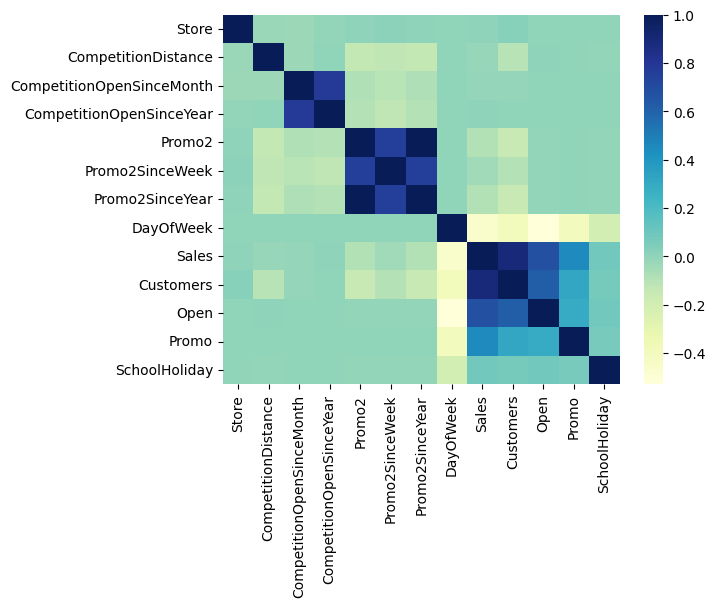

In [16]:
sns.heatmap(complete_train_date_indexed.corr(), cmap="YlGnBu")

In [17]:
customer_sales=complete_train_date_indexed.groupby(complete_train_date_indexed.index.month).agg({"Sales":"mean","Customers":"mean"})

- What can you say about the correlation between sales and number of customers?

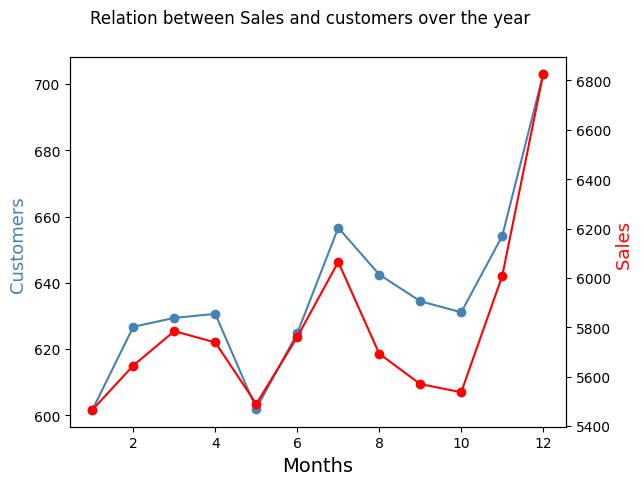

In [18]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()

# explore_feature_df_with_decile_agg.plot(linestyle='-', marker='o', figsize=(10,7), title='Top 5 deciled customers by duration').set_xlabel("Decile By Duration")

#add first line to plot
ax.plot(customer_sales['Customers'], color=col1,linestyle='-', marker='o')

#add x-axis label
ax.set_xlabel('Months', fontsize=14)

#add y-axis label
ax.set_ylabel('Customers ', color=col1, fontsize=13)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(customer_sales['Sales'], color=col2,linestyle='-', marker='o')

plt.suptitle("Relation between Sales and customers over the year")
#add second y-axis label
ax2.set_ylabel('Sales ', color=col2, fontsize=13)
plt.show()

- From the above plot we can see a very steep increase in sales and customers towards the end of the year. January(1), May(5) and October(10) is when we have the lowest average sales.
- The graph of the average number of customers per month resembles the graph of the average sales per month. This shows there is some correlation between average sales and average customers.

***
- Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [19]:
test_promo = complete_test['Promo']
train_promo = complete_train_date_indexed['Promo']

c:\Users\natnael.masresha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\natnael.masresha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


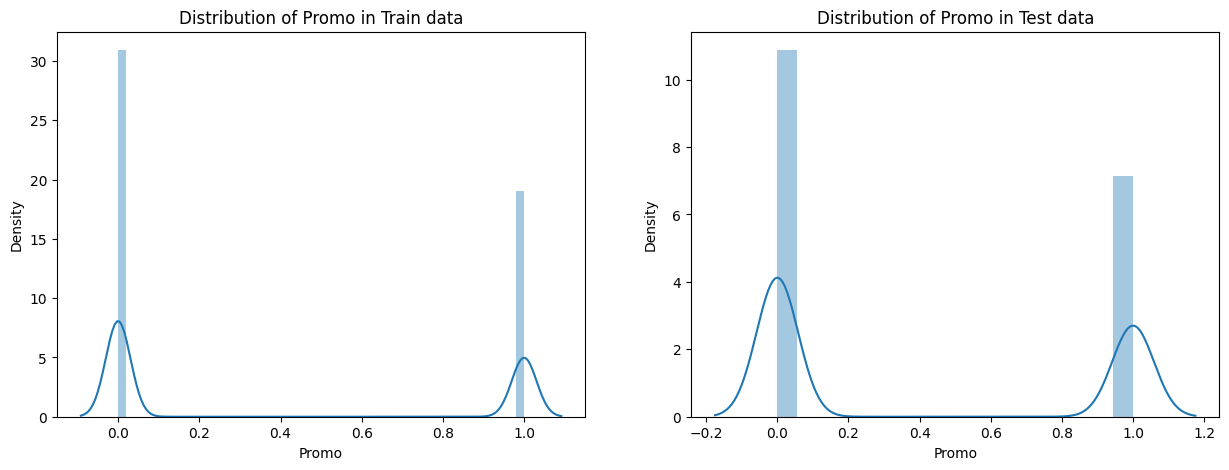

In [20]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_promo, ax=axes[0])
axes[0].set_title('Distribution of Promo in Train data')
sns.distplot(test_promo, ax=axes[1])
axes[1].set_title('Distribution of Promo in Test data')
plt.show()

- Check & compare sales behavior before, during and after holidays
> we will focus on these two specific columns `StateHoliday` and `SchoolHoliday`
> - StateHoliday : **Public Holiday**('a'), **Easter Holiday**('b'), **Christmas Holiday**('c'), and  **None**('0'),
> - SchooldHoliday : **Store & Date were affected by closure of public schools**('1'), **'0' otherwise**

we will analyze behavior of sales before, during, and after these holidays

In [21]:
complete_train_date_indexed['day'] = complete_train_date_indexed.index.day
complete_train_date_indexed['month'] = complete_train_date_indexed.index.month
complete_train_date_indexed['year'] = complete_train_date_indexed.index.year

In [22]:
public_holiday_sales = complete_train_date_indexed.query('StateHoliday == "a"')
public_holiday_dates = public_holiday_sales.index.unique()
len(public_holiday_dates)
# we have 27 public holiday dates in the dataset

27

In [23]:

avg_sales_within_publicholidays=public_holiday_sales.groupby(public_holiday_sales.index).agg({"Sales":"mean","Customers":"mean"})

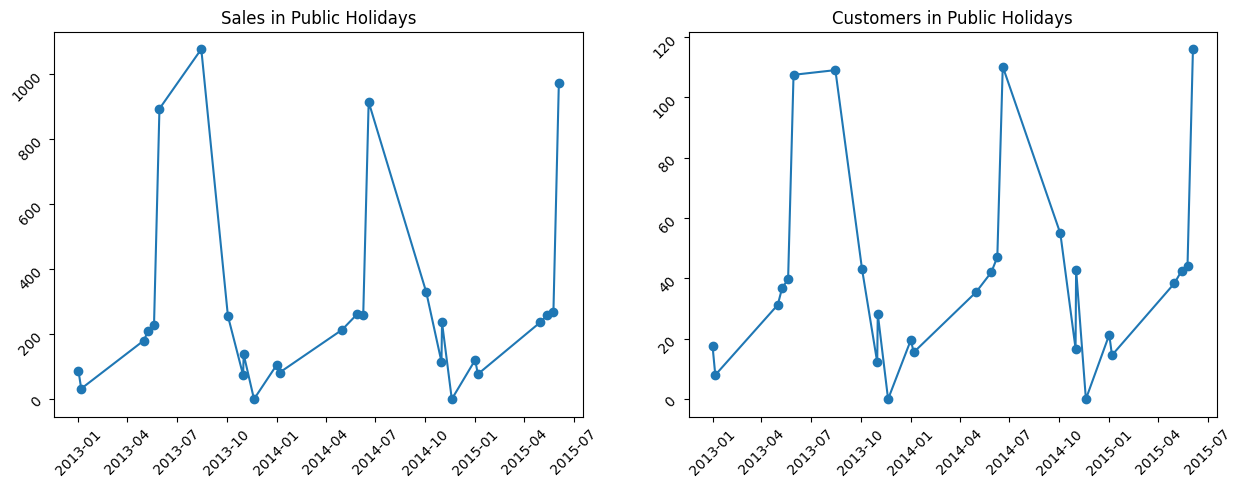

In [24]:

fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(avg_sales_within_publicholidays["Sales"],linestyle='-',marker="o")
ax[1].plot(avg_sales_within_publicholidays["Customers"],linestyle='-',marker="o")
ax[0].tick_params(labelrotation=45)
ax[1].tick_params(labelrotation=45)

ax[0].set_title("Sales in Public Holidays")
ax[1].set_title("Customers in Public Holidays")

plt.show()

- during the public holidays in 2013 between the months 04 and 10 sales increased
- during the public holidays in 2014 between the months 01 and 07 sales increased again
- we have the highest amount of sales from public holiday seasons in 2013-07

In [25]:
christmas_holiday_sales = complete_train_date_indexed.query('StateHoliday == "c"')
christmas_holiday_dates = christmas_holiday_sales.index.unique()
sorted(christmas_holiday_dates)
# we have 4 christmas holiday dates in the dataset

[Timestamp('2013-12-25 00:00:00'),
 Timestamp('2013-12-26 00:00:00'),
 Timestamp('2014-12-25 00:00:00'),
 Timestamp('2014-12-26 00:00:00')]

so we will analyze sales <br>
before 2013-12-25 <br>
during 2013-12-25 and 2013-12-26 <br>
after 2013-12-26

so we will analyze sales <br>
before 2014-12-25 <br>
during 2014-12-25 and 2014-12-26 <br>
after 2014-12-26

In [26]:
# For the year 2013
before = complete_train_date_indexed.query('day < 25 and month <= 12 and year == 2013')
during = complete_train_date_indexed.query('(day == 25 or day == 26) and month == 12 and year == 2013')
after = complete_train_date_indexed.query('day > 26 and month >= 12 and year == 2013')

avg_sales_before_2013 = before.groupby(before['day'])['Sales'].mean()
avg_sales_during_2013 = during.groupby(during['day'])['Sales'].mean()
avg_sales_after_2013 = after.groupby(after['day'])['Sales'].mean()




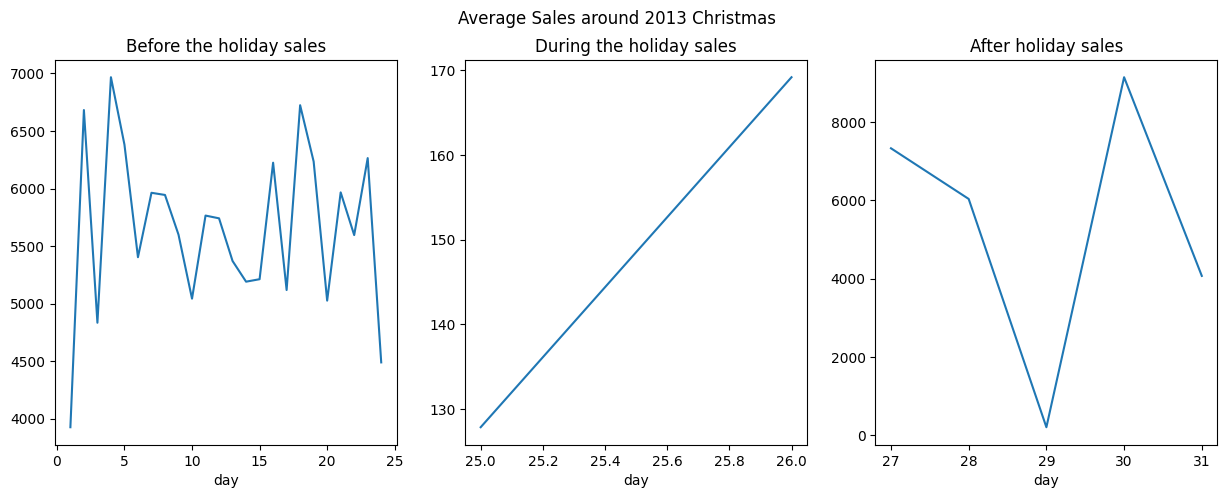

In [27]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig.suptitle("Average Sales around 2013 Christmas")
avg_sales_before_2013.plot(ax=axes[0])
axes[0].set_title('Before the holiday sales')

avg_sales_during_2013.plot(ax=axes[1])
axes[1].set_title('During the holiday sales')

avg_sales_after_2013.plot(ax=axes[2])
axes[2].set_title('After holiday sales')
plt.show()

In [28]:
# For the year 2014
before = complete_train_date_indexed.query('day < 25 and month <= 12 and year == 2014')
during = complete_train_date_indexed.query('(day == 25 or day == 26) and month == 12 and year == 2014')
after = complete_train_date_indexed.query('day > 26 and month >= 12 and year == 2014')

avg_sales_before_2014 = before.groupby(before['day'])['Sales'].mean()
avg_sales_during_2014 = during.groupby(during['day'])['Sales'].mean()
avg_sales_after_2014 = after.groupby(after['day'])['Sales'].mean()

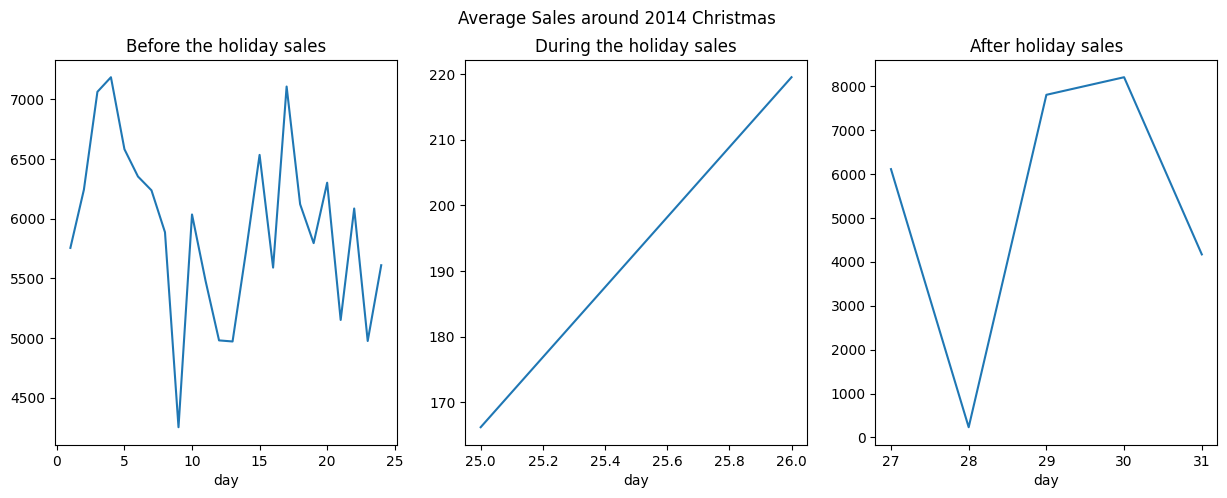

In [29]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig.suptitle("Average Sales around 2014 Christmas")
avg_sales_before_2014.plot(ax=axes[0])
axes[0].set_title('Before the holiday sales')

avg_sales_during_2014.plot(ax=axes[1])
axes[1].set_title('During the holiday sales')

avg_sales_after_2014.plot(ax=axes[2])
axes[2].set_title('After holiday sales')
plt.show()

We can see that the shopping pattern around christmas is the same for 2013 and 2014

### Easter Holidays

In [30]:
easter_holiday_sales = complete_train_date_indexed.query('StateHoliday == "b"')
easter_holiday_dates = easter_holiday_sales.index.unique()
sorted(easter_holiday_dates)
# 6 days of easter holidays

[Timestamp('2013-03-29 00:00:00'),
 Timestamp('2013-04-01 00:00:00'),
 Timestamp('2014-04-18 00:00:00'),
 Timestamp('2014-04-21 00:00:00'),
 Timestamp('2015-04-03 00:00:00'),
 Timestamp('2015-04-06 00:00:00')]

so we will analyze sales <br>
before 2013-03-29 <br>
during 2013-03-29 and 2013-04-01 <br>
after 2013-04-01

so we will analyze sales <br>
before 2014-04-18 <br>
during 2014-04-18 and 2014-04-21 <br>
after 2014-04-21

so we will analyze sales <br>
before 2015-04-03 <br>
during 2015-04-03 and 2016-04-06 <br>
after 2015-04-06

In [31]:
# For the year 2013
before = complete_train_date_indexed.query('day < 29 and month < 3 and year == 2013')
during = complete_train_date_indexed.query('(day >= 29 and month == 3) or (day <= 1 and month == 4) and year == 2013')
after = complete_train_date_indexed.query('day > 2 and month > 4 and year == 2013')

avg_sales_before_2014 = before.groupby(before['day'])['Sales'].mean()
avg_sales_during_2014 = during.groupby(during['day'])['Sales'].mean()
avg_sales_after_2014 = after.groupby(after['day'])['Sales'].mean()

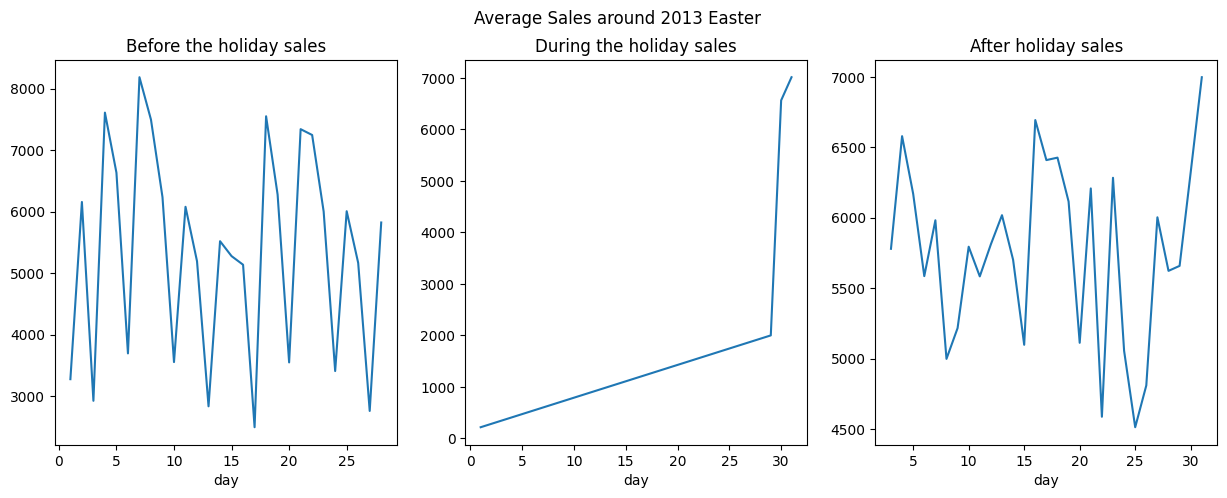

In [32]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig.suptitle("Average Sales around 2013 Easter")
avg_sales_before_2014.plot(ax=axes[0])
axes[0].set_title('Before the holiday sales')

avg_sales_during_2014.plot(ax=axes[1])
axes[1].set_title('During the holiday sales')

avg_sales_after_2014.plot(ax=axes[2])
axes[2].set_title('After holiday sales')
plt.show()

In [33]:
# For the year 2014
before = complete_train_date_indexed.query('day < 3 and month <= 4 and year == 2015')
during = complete_train_date_indexed.query('(day >= 3 and day <= 6) and month == 4 and year == 2014')
after = complete_train_date_indexed.query('day > 6 and month >= 4 and year == 2015')

avg_sales_before_2014 = before.groupby(before['day'])['Sales'].mean()
avg_sales_during_2014 = during.groupby(during['day'])['Sales'].mean()
avg_sales_after_2014 = after.groupby(after['day'])['Sales'].mean()

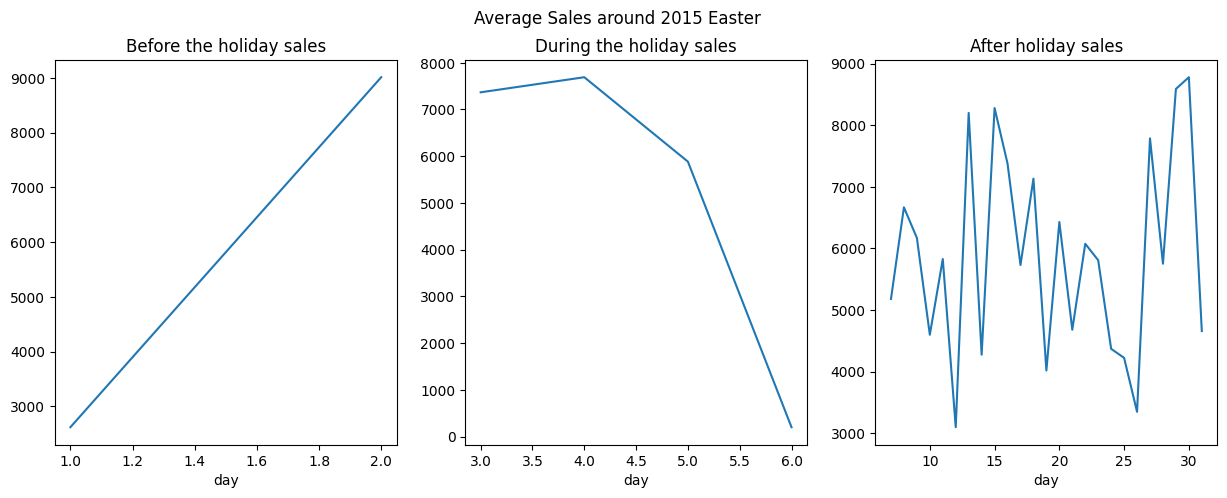

In [34]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig.suptitle("Average Sales around 2015 Easter")
avg_sales_before_2014.plot(ax=axes[0])
axes[0].set_title('Before the holiday sales')

avg_sales_during_2014.plot(ax=axes[1])
axes[1].set_title('During the holiday sales')

avg_sales_after_2014.plot(ax=axes[2])
axes[2].set_title('After holiday sales')
plt.show()

In [35]:
# For the year 2015
before = complete_train_date_indexed.query('day < 3 and month <= 4 and year == 2015')
during = complete_train_date_indexed.query('(day >= 3 and day <= 6) and month == 4 and year == 2015')
after = complete_train_date_indexed.query('day > 6 and month >= 4 and year == 2015')

avg_sales_before_2014 = before.groupby(before['day'])['Sales'].mean()
avg_sales_during_2014 = during.groupby(during['day'])['Sales'].mean()
avg_sales_after_2014 = after.groupby(after['day'])['Sales'].mean()

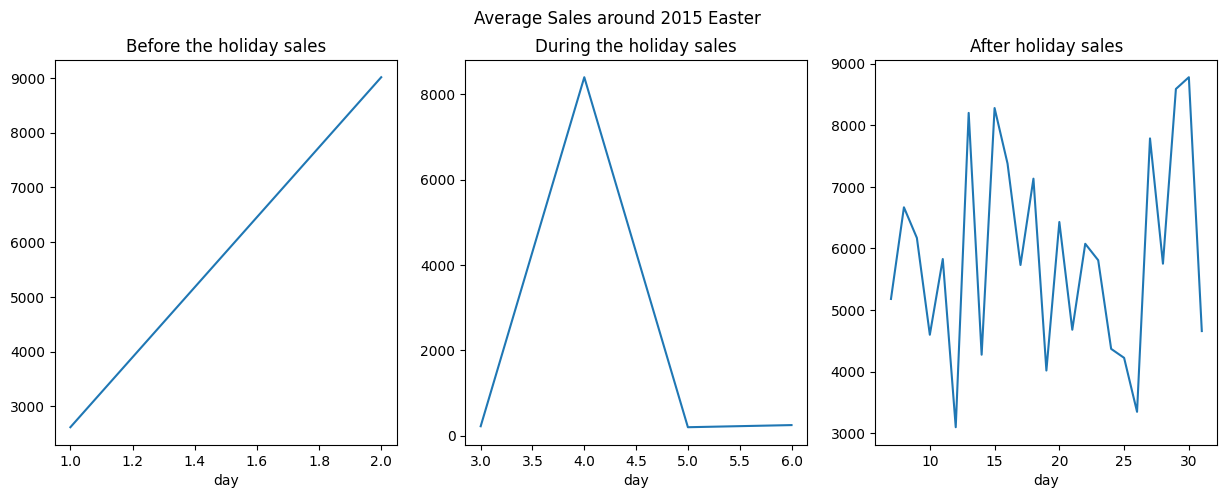

In [36]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig.suptitle("Average Sales around 2015 Easter")
avg_sales_before_2014.plot(ax=axes[0])
axes[0].set_title('Before the holiday sales')

avg_sales_during_2014.plot(ax=axes[1])
axes[1].set_title('During the holiday sales')

avg_sales_after_2014.plot(ax=axes[2])
axes[2].set_title('After holiday sales')
plt.show()

- How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [51]:
promo_sales_df=complete_train_date_indexed[complete_train_date_indexed["Promo"]==1]
no_promo_sales_df=complete_train_date_indexed[complete_train_date_indexed["Promo"]==0]
grand_sales=complete_train_date_indexed.groupby(complete_train_date_indexed.index.month).agg({"Sales":"mean"})
grand_sales.rename(columns={"Sales":"avg Grand Sale"},inplace=True)

In [52]:

promo_sales=promo_sales_df.groupby(promo_sales_df.index.month).agg({"Sales":"mean"})["Sales"]
no_promo_sales=no_promo_sales_df.groupby(no_promo_sales_df.index.month).agg({"Sales":"mean"})["Sales"]
grand_sales["avg sales (promo)"]=promo_sales
grand_sales["avg sales (no promo)"]=no_promo_sales
grand_sales.index.name="Month"
increased_by=np.round((grand_sales["avg sales (promo)"]-grand_sales["avg sales (no promo)"])/grand_sales["avg sales (no promo)"] *100,2)
grand_sales["increased by %"]=increased_by
grand_sales

,avg Grand Sale,avg sales (promo),avg sales (no promo),increased by %
Month,,,,
1,5465.395529,7637.813837,4154.433175,83.85
2,5645.253150,7746.883378,4477.680801,73.01
3,5784.578871,8011.451617,4246.012246,88.68
4,5738.866916,7948.050722,4266.077711,86.31
5,5489.639973,7276.331266,4361.203367,66.84
6,5760.964375,8177.309526,4362.027708,87.47
7,6064.915711,8231.498481,4500.161489,82.92
8,5693.016554,7860.176928,4407.173499,78.35
9,5570.246033,7893.042646,4242.340072,86.05


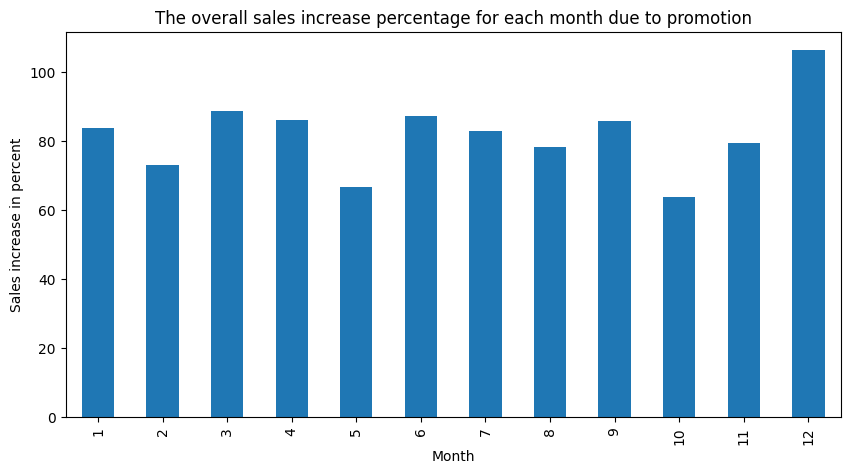

In [39]:
ax = grand_sales["increased by %"].plot(kind="bar",figsize=(10,5))
ax.set_title("The overall sales increase percentage for each month due to promotion")
ax.set_xlabel("Month")
ax.set_ylabel("Sales increase in percent")
plt.show()

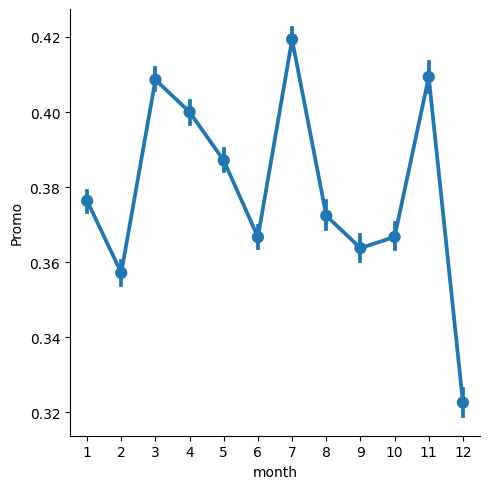

In [41]:
sns.catplot(data=complete_train_date_indexed, x='month', y='Promo', kind='point')

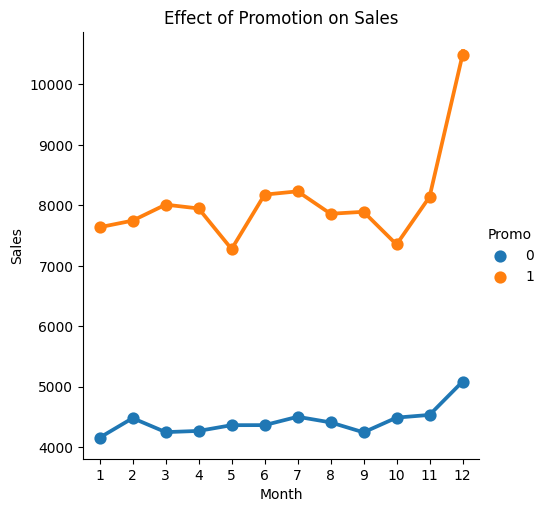

In [44]:
ax = sns.catplot(data=complete_train_date_indexed, x='month', y='Sales',kind='point', hue='Promo')
ax.set(xlabel='Month', ylabel='Sales', title='Effect of Promotion on Sales')
# ax.fig.suptitle("Effect of Promotion on Sales", fontsize=20)
# ax.set_xlabel("Month")
# ax.set_ylabel("Sales")
plt.show()

From the above plot it can be seen that there is a significant increase in average sales when there is promotion. The promotion had huge impact during the month of December.

- Are the promos attracting more customers?

In [54]:
promo_customers_df=complete_train_date_indexed[complete_train_date_indexed["Promo"]==1]
no_promo_customers_df=complete_train_date_indexed[complete_train_date_indexed["Promo"]==0]
all_customers=complete_train_date_indexed.groupby(complete_train_date_indexed.index.month).agg({"Customers":"mean"})
all_customers.rename(columns={"Customers":"Avg Customers"},inplace=True)

In [55]:
promo_customers=promo_customers_df.groupby(promo_customers_df.index.month).agg({"Customers":"mean"})["Customers"]
no_promo_customers=no_promo_customers_df.groupby(no_promo_customers_df.index.month).agg({"Customers":"mean"})["Customers"]
all_customers["avg customers (promo)"]=promo_customers
all_customers["avg customers (no promo)"]=no_promo_customers
all_customers.index.name="Month"
increased_by=np.round((all_customers["avg customers (promo)"]-all_customers["avg customers (no promo)"])/all_customers["avg customers (no promo)"] *100,2)
all_customers["increased by %"]=increased_by
all_customers

,Avg Customers,avg customers (promo),avg customers (no promo),increased by %
Month,,,,
1,601.617172,784.409430,491.309793,59.66
2,626.715129,802.366338,529.131124,51.64
3,629.401958,819.882134,497.797472,64.70
4,630.612945,813.912182,508.413453,60.09
5,601.991263,757.219283,503.952514,50.26
6,624.794091,824.967387,508.904288,62.11
7,656.629781,834.390619,528.246955,57.95
8,642.496979,831.339658,530.450796,56.72
9,634.438699,832.362271,521.288934,59.67


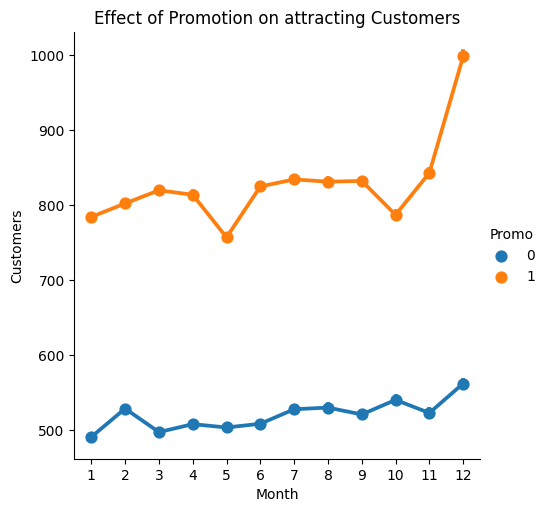

In [60]:
ax = sns.catplot(data=complete_train_date_indexed, x='month', y='Customers', hue='Promo',kind='point')
ax.set(xlabel='Month', ylabel='Customers', title='Effect of Promotion on attracting Customers')
plt.show()

As shown in the above figure, promotion directly impacts the number of Customers

- Could the promos be deployed in more effective ways? Which stores should promos be deployed in?


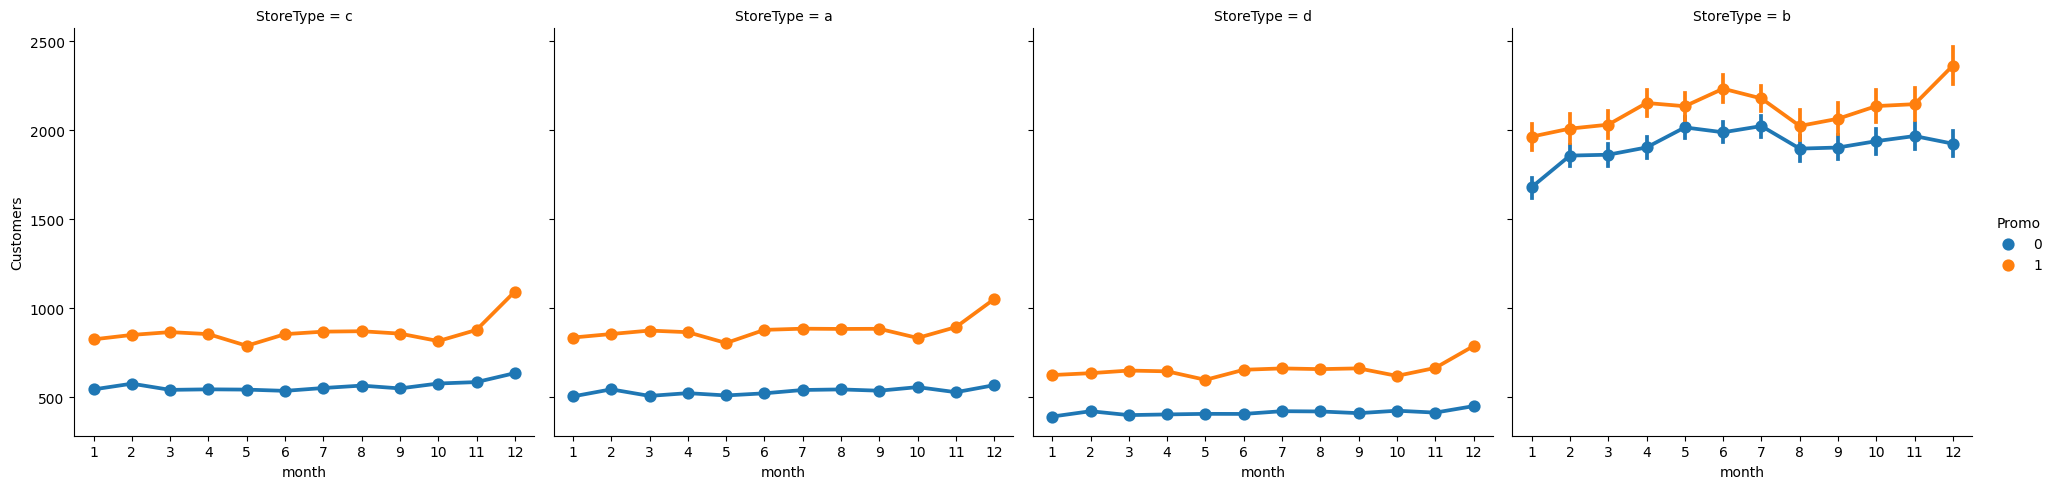

In [66]:
ax = sns.catplot(data = complete_train_date_indexed, x ="month", y = "Customers", 
               col = 'StoreType',
               hue = 'Promo',
               sharey=True,
               sharex=True,
               kind='point')

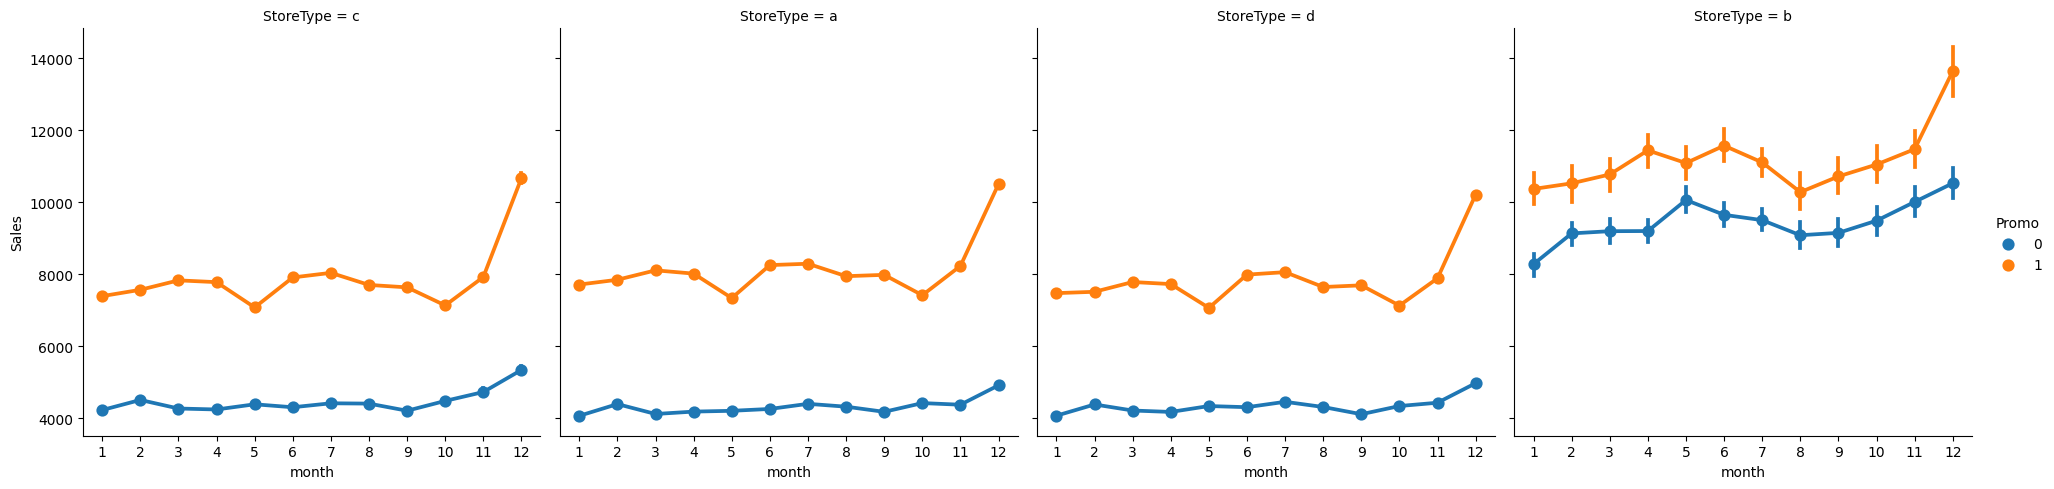

In [68]:
ax = sns.catplot(data = complete_train_date_indexed, x ="month", y = "Sales", 
               col = 'StoreType',
               hue = 'Promo',
               sharey=True,
               sharex=True,
               kind='point')

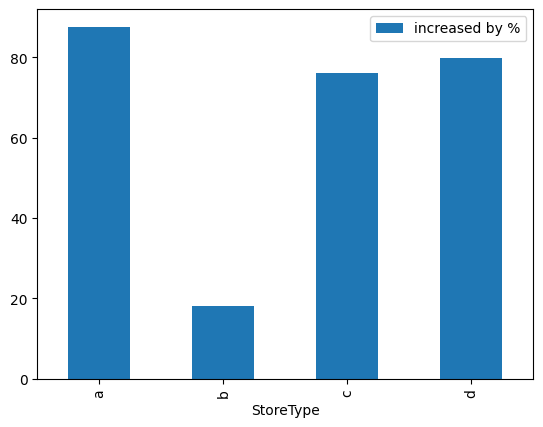

In [131]:
sales_by_promo=complete_train_date_indexed.groupby(["StoreType","Promo"]).agg({"Sales":"mean"})
# a.plot(kind='bar')

sales_by_promo=sales_by_promo.reset_index()
sales_by_promo["increased by %"]=sales_by_promo.groupby(sales_by_promo.index//2)['Sales'].diff(1)

sales_by_promo.fillna(method="bfill",inplace=True)
sales_by_promo.drop(index=sales_by_promo[sales_by_promo["Promo"]==1].index,inplace=True)
sales_by_promo.drop(columns="Promo",inplace=True)
sales_by_promo["increased by %"]=np.round(sales_by_promo["increased by %"]*100/sales_by_promo["Sales"],2)
sales_by_promo.drop(columns=["Sales"],inplace=True)
sales_by_promo.index=sales_by_promo["StoreType"]
sales_by_promo.drop(columns="StoreType",inplace=True)


sales_by_promo.plot(kind='bar')
plt.show()


We have a more similar trends regarding the three stores namely 'a', 'd', and 'c'
<br>However Promotion seems to have a bigger impact in StoreType 'a'. We can see there is more than 80% growth in sales due to promotion.

- Trends of customer behavior during store open and closing times


In [137]:
non_holiday_sales = complete_train_date_indexed[complete_train_date_indexed['StateHoliday'] == '0']
holiday_sales = complete_train_date_indexed[complete_train_date_indexed['StateHoliday'] != '0']
all_week_stores = non_holiday_sales[(non_holiday_sales["DayOfWeek"] == 7) & (non_holiday_sales["Open"] == 1)]["Store"].unique()
weekday_sales = non_holiday_sales[non_holiday_sales['DayOfWeek'] != 7]

In [140]:
all_week_sales_df = complete_train_date_indexed[complete_train_date_indexed["Store"].isin(all_week_stores)]
all_week_open_customers = all_week_sales_df.groupby("DayOfWeek").agg({"Customers": "mean"})

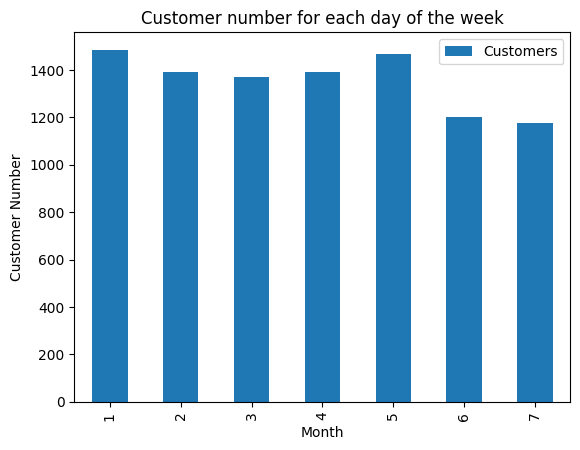

In [141]:
ax = all_week_open_customers.plot(kind="bar")
ax.set_title("Customer number for each day of the week")
ax.set_xlabel("Month")
ax.set_ylabel("Customer Number")
plt.show()

- Which stores are opened on all weekdays? How does that affect their sales on weekends?

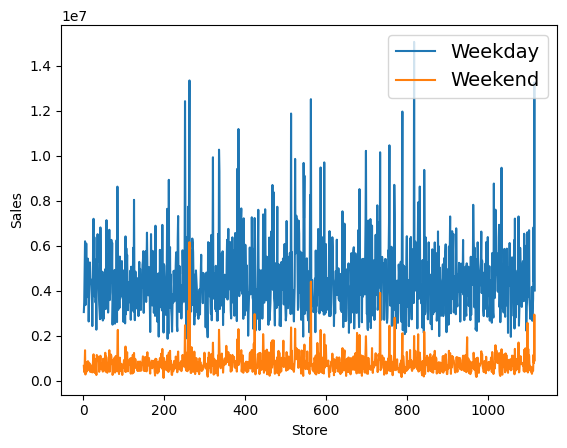

In [143]:
stores_open_on_weekdays = complete_train_date_indexed.query("Open==1")['Store'].unique()
sales_stores_open_on_weekdays = complete_train_date_indexed[(complete_train_date_indexed["Store"].isin(stores_open_on_weekdays) &complete_train_date_indexed['Open']==1 & ~complete_train_date_indexed['DayOfWeek'].isin([6,7]))].groupby('Store')['Sales'].sum()
sns.lineplot(data=sales_stores_open_on_weekdays)
sales_stores_open_on_weekdays = complete_train_date_indexed[(complete_train_date_indexed["Store"].isin(stores_open_on_weekdays) & complete_train_date_indexed['Open']==1 & complete_train_date_indexed['DayOfWeek'].isin([6,7]))].groupby('Store')['Sales'].sum()
sns.lineplot(data=sales_stores_open_on_weekdays)
plt.legend(['Weekday', 'Weekend'], fontsize=14, loc='upper right')
plt.show()

- Check how the assortment type affects sales


In [146]:
a_assortment_df = complete_train_date_indexed[complete_train_date_indexed.Assortment == 'a']
b_assortment_df = complete_train_date_indexed[complete_train_date_indexed.Assortment == 'b']
c_assortment_df = complete_train_date_indexed[complete_train_date_indexed.Assortment == 'c']

a_sales_agg = a_assortment_df.groupby("month").agg({"Sales":  "mean"})
a_sales_agg = a_sales_agg.rename(columns={"Sales": "A-type assortment sales"})

b_sales_agg = b_assortment_df.groupby("month").agg({"Sales":  "mean"})
b_sales_agg = b_sales_agg.rename(columns={"Sales": "B-type assortment sales"})

c_sales_agg = c_assortment_df.groupby("month").agg({"Sales":  "mean"})
c_sales_agg = c_sales_agg.rename(columns={"Sales": "C-type assortment sales"})

assortment_sales = pd.merge(a_sales_agg, b_sales_agg, on="month")
assortment_sales = pd.merge(assortment_sales, c_sales_agg, on="month")


assortment_sales

,A-type assortment sales,B-type assortment sales,C-type assortment sales
month,,,
1,5244.218557,7426.112306,5686.660861
2,5396.380089,8104.128307,5889.798663
3,5499.371503,8224.057348,6071.465153
4,5477.054244,8577.082716,5991.714815
5,5210.639323,9131.075269,5748.264667
6,5466.127693,8999.653086,6044.960386
7,5731.631242,8852.003722,6391.777452
8,5324.694316,7949.796964,6063.191033
9,5294.767818,8254.686275,5829.499342


- How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?


,Sales,CompetitionDistance
Sales,1.000000,-0.018869
CompetitionDistance,-0.018869,1.000000


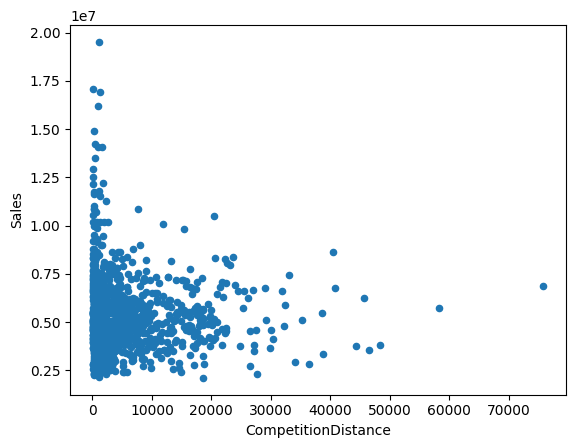

In [147]:
competition_df = complete_train_date_indexed[["Store", "Sales", "Customers", "StoreType", "CompetitionDistance"]]
competition_df_agg = competition_df.groupby("Store").agg({"Sales": "sum", "Customers" : "sum",
                                                      "CompetitionDistance": "mean"})
competition_df_agg.plot(x='CompetitionDistance', y='Sales',kind='scatter')

competition_df_corr = competition_df[["Sales", "CompetitionDistance"]].corr()
display(competition_df_corr)


As we can see there is a low correlation between Competition Distance and Sales

- How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

In [150]:
store_raw = util.read_from_dvc('data/store.csv',repo,'store-v0',low_memory=False)
sales_train_df_raw = util.read_from_dvc('data/train.csv',repo,'train-v0',low_memory=False)
sales_test_df_raw = util.read_from_dvc('data/test.csv',repo,'test-v0',low_memory=False)


In [154]:
merged_train_df_1 = pd.merge(sales_train_df_raw, store_raw, on="Store")

In [163]:
has_open_competition_df = merged_train_df_1[merged_train_df_1['CompetitionOpenSinceMonth'].notnull()]

has_open_competition_df["CompetitionOpenSinceYear"] = has_open_competition_df["CompetitionOpenSinceYear"].astype("int").astype("str")
has_open_competition_df["CompetitionOpenSinceMonth"] = has_open_competition_df["CompetitionOpenSinceMonth"].astype("int").astype("str")

has_open_competition_df["CompetitionOpenSinceDate"] = has_open_competition_df["CompetitionOpenSinceYear"] + "-" + has_open_competition_df["CompetitionOpenSinceMonth"] + "-" + "01" 
has_open_competition_df["CompetitionOpenSinceDate"] =  pd.to_datetime(has_open_competition_df["CompetitionOpenSinceDate"])

competition_df = has_open_competition_df[["Date", "Sales", "Store", "CompetitionOpenSinceDate"]]

competition_df


,Date,Sales,Store,CompetitionOpenSinceDate
0,2015-07-31,5263,1,2008-09-01
1,2015-07-30,5020,1,2008-09-01
2,2015-07-29,4782,1,2008-09-01
3,2015-07-28,5011,1,2008-09-01
4,2015-07-27,6102,1,2008-09-01
...,...,...,...,...
1014378,2013-01-05,9513,1112,2006-04-01
1014379,2013-01-04,9788,1112,2006-04-01
1014380,2013-01-03,8716,1112,2006-04-01
1014381,2013-01-02,10797,1112,2006-04-01


In [164]:
competition_df["BeforeCompetition"] = competition_df["Date"] < competition_df["CompetitionOpenSinceDate"]

competition_df_agg = competition_df.groupby("BeforeCompetition").agg({"Sales": "mean"})

In [166]:
competition_df_agg

,Sales
BeforeCompetition,
False,5753.971338
True,5974.642737


In [169]:

decrease = competition_df_agg["Sales"][True] - competition_df_agg["Sales"][False]
decrease_percent = decrease / competition_df_agg["Sales"][True]

print(f"Overall avg sales decreased by {decrease_percent * 100:.2f}% after exposed to competition ")

Overall avg sales decreased by 3.69% after exposed to competition 
